In [1]:
#je vais me connecter à la base de données annonces.db faire des prédictions des prix grace à un modèle de machine learning
#je vais ensuite enregistrer le modèle dans un fichier pour pouvoir l'utiliser plus tard
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np



In [2]:
#je me connecte à la base de données
conn = sqlite3.connect("annonces.db")
#je récupère les données
data = pd.read_sql_query("SELECT * FROM annonces", conn)
#je ferme la connexion
conn.close()

In [3]:
# je vais faire un boxplot pour voir si il y a des valeurs aberrantes
print(data.head())

# je vais supprimer les valeurs aberrantes
# data = data[data["price"] < 1000000]


   id  location  pieces  surface   price  \
0   1         9       1     30.0  1500.0   
1   2        20       1     32.0  1350.0   
2   3         7       1     45.0  1600.0   
3   4        11       1     19.0   950.0   
4   5        15       2     37.0  1690.0   

                                         description  
0  Idéal pour un(e) étudiant (e) ou un couple (de...  
1  Location Meublée - Loyer charges comprises inc...  
2  Quartier des Invalides proche Concorde. Logeme...  
3  Métro Bastille ou Ledru-Rollin. Immeuble pierr...  
4  Appartement disponible à partir du 30 novembre...  


['id', 'location', 'pieces', 'surface', 'price', 'description']


<Axes: >

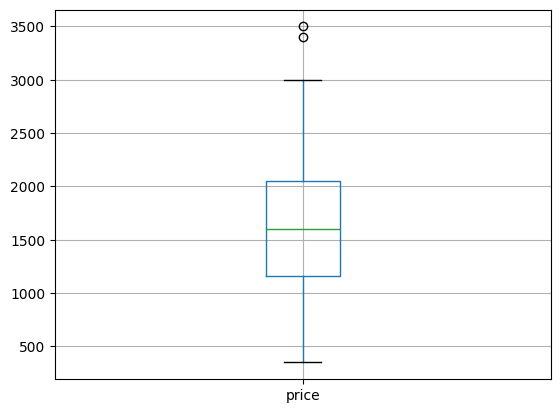

In [4]:
import matplotlib.pyplot as plt
data.columns = data.columns.str.strip()
print(data.columns.tolist())

data = data[data["price"] < 3500]

#je crée un boxplot pour voir si il y a des valeurs aberrantes
data.boxplot(column="price")

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# # Supposons que votre dataframe s'appelle df
# features_to_standardize = ['surface', 'price']

# scaler = StandardScaler()

# # Standardisation des caractéristiques dans l'ensemble d'entraînement
# data[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])

X = data[['surface','location']]
y = data['price']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression des forêts aléatoires
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Affichage des résultats
results = pd.DataFrame({'Location': X_test['location'],'Surface': X_test['surface'],  
                        'Prix Réel': y_test, 'Prix Prédit': y_pred})
print(results)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calcul des erreurs
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# MAPE - Erreur moyenne absolue en pourcentage
mape = (abs((y_test - y_pred) / y_test).mean()) * 100

# Affichage des résultats
print(f'Coefficient de détermination (R²): {r2}')
print(f'Erreur quadratique moyenne (MSE): {mse}')
print(f'Racine carrée de l\'erreur quadratique moyenne (RMSE): {rmse}')
print(f'Erreur absolue moyenne (MAE): {mae}')
print(f'Erreur moyenne absolue en pourcentage (MAPE): {mape:.2f}%')


     Location  Surface  Prix Réel  Prix Prédit
81         15    24.00     1000.0  1020.000000
10         16    23.00     1500.0   988.200000
4          15    37.00     1690.0  1385.180000
89         17    97.99     3400.0  2709.900000
66          8    40.00     3000.0  1992.920000
70          8    52.00     2400.0  2305.820000
30          4    27.00     1995.0  1339.910000
46          8    36.00     1600.0   954.350000
101        16     9.13      480.0   613.263333
11         17    75.00     3000.0  2731.240000
82         13    62.00     1800.0  2033.660000
83          7    70.00     2230.0  2688.140000
0           9    30.00     1500.0  1230.130000
85         15    37.00     1650.0  1385.180000
18         15    30.00     1350.0  1169.550000
73          8    14.00      630.0   693.300000
58         17    19.00      810.0   949.800000
75         11    33.00     1495.0  1300.690000
116        14    72.54     2350.0  2731.110000
43         15    27.00     1250.0  1126.250000
12         16

In [6]:
#je vais le faire avec un modèle de régression linéaire
#je vais créer un modèle de régression linéaire
model = LinearRegression()
#je vais entrainer mon modèle
model.fit(X_train, y_train)
#je vais faire des prédictions
y_pred = model.predict(X_test)
#je vais afficher les résultats
results = pd.DataFrame({'Location': X_test['location'],'Surface': X_test['surface'], 
                        'Prix Réel': y_test, 'Prix Prédit': y_pred})
print(results)
#je vais calculer les erreurs
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#je vais afficher les résultats
print(f'Coefficient de détermination (R²): {r2}')
print(f'Erreur quadratique moyenne (MSE): {mse}')
print(f'Racine carrée de l\'erreur quadratique moyenne (RMSE): {rmse}')
print(f'Erreur absolue moyenne (MAE): {mae}')


     Location  Surface  Prix Réel  Prix Prédit
81         15    24.00     1000.0  1015.087706
10         16    23.00     1500.0   956.445351
4          15    37.00     1690.0  1421.658559
89         17    97.99     3400.0  3274.366003
66          8    40.00     3000.0  1707.056324
70          8    52.00     2400.0  2082.352495
30          4    27.00     1995.0  1409.956169
46          8    36.00     1600.0  1581.957600
101        16     9.13      480.0   522.665526
11         17    75.00     3000.0  2555.361087
82         13    62.00     1800.0  2258.260933
83          7    70.00     2230.0  2672.664428
0           9    30.00     1500.0  1366.941839
85         15    37.00     1650.0  1421.658559
18         15    30.00     1350.0  1202.735792
73          8    14.00      630.0   893.914618
58         17    19.00      810.0   803.978952
75         11    33.00     1495.0  1406.030533
116        14    72.54     2350.0  2560.528396
43         15    27.00     1250.0  1108.911749
12         16

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle avec des hyperparamètres ajustés
model = MLPRegressor(hidden_layer_sizes=(96, 64, 32), max_iter=2000, random_state=42)

# Entraînement du modèle
model.fit(X_train_scaled, y_train)

# Prédictions
y_pred = model.predict(X_test_scaled)

# Affichage des résultats
results = pd.DataFrame({'Location': X_test['location'], 'Surface': X_test['surface'], 
                        'Prix Réel': y_test, 'Prix Prédit': y_pred})
print(results)

# Calcul des erreurs
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f'Coefficient de détermination (R²): {r2}')
print(f'Erreur quadratique moyenne (MSE): {mse}')
print(f'Racine carrée de l\'erreur quadratique moyenne (RMSE): {rmse}')
print(f'Erreur absolue moyenne (MAE): {mae}')

# Enregistrement du modèle
joblib.dump(model, 'mlp_model.pkl')


     Location  Surface  Prix Réel  Prix Prédit
81         15    24.00     1000.0  1006.617752
10         16    23.00     1500.0   985.412684
4          15    37.00     1690.0  1472.174341
89         17    97.99     3400.0  3147.551172
66          8    40.00     3000.0  1697.748764
70          8    52.00     2400.0  2263.246440
30          4    27.00     1995.0  1289.509983
46          8    36.00     1600.0  1516.222480
101        16     9.13      480.0   576.043071
11         17    75.00     3000.0  2462.199508
82         13    62.00     1800.0  2225.989390
83          7    70.00     2230.0  2973.144151
0           9    30.00     1500.0  1209.449307
85         15    37.00     1650.0  1472.174341
18         15    30.00     1350.0  1235.046961
73          8    14.00      630.0   720.503086
58         17    19.00      810.0   861.194020
75         11    33.00     1495.0  1240.148857
116        14    72.54     2350.0  2499.681688
43         15    27.00     1250.0  1120.148450
12         16

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


['mlp_model.pkl']